
## Plot Metrics: Training Time vs. EER

This cell reads the model metrics from `model_metrics.csv` and creates a scatter plot comparing the training time (in seconds) versus the Equal Error Rate (EER). Each model is annotated on the plot.



Metrics Data:
                   Model  Training Time (sec)  Accuracy     EER
0          Random Forest                31.20    0.9963  0.0039
1          Decision Tree                18.30    0.9823  0.0786
2    Logistic Regression                21.49    0.9403  0.0864
3               LightGBM                 2.28    0.9992  0.0020
4   MLP (Neural Network)                11.94    0.9817  0.0334
5                    SVM                40.60    0.9257  0.1061
6           PySR (Basic)               250.51    0.8997  0.3242
7    PySR (L2MarginLoss)               178.19    0.9041  0.7367
8           PySR (Basic)                95.43    0.9001  0.2633
9        PySR (Extended)               221.83    0.9354  0.0668
10        PySR (Complex)               418.49    0.9287  0.1238


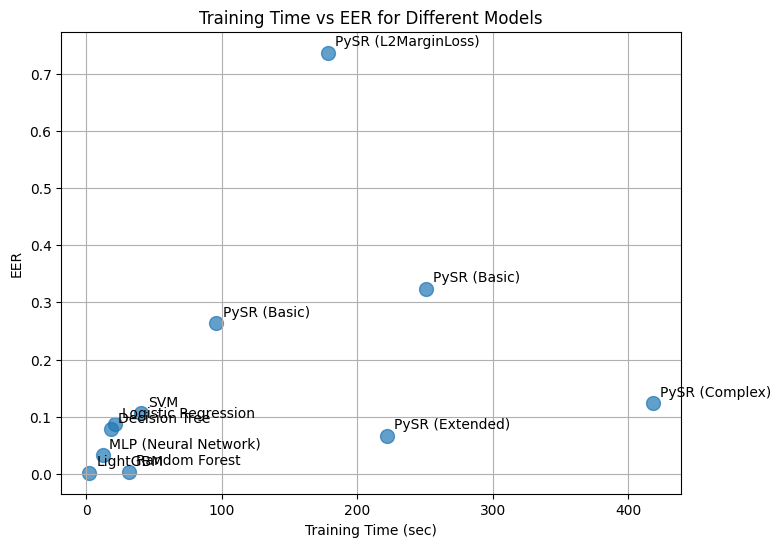

In [4]:

# %% Read CSV and plot metrics
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing metrics
df_metrics = pd.read_csv("model_metrics.csv")
print("Metrics Data:")
print(df_metrics)

# Create a scatter plot: Training Time vs EER
plt.figure(figsize=(8, 6))
plt.scatter(df_metrics["Training Time (sec)"], df_metrics["EER"], s=100, alpha=0.7)

# Label the axes and title
plt.xlabel("Training Time (sec)")
plt.ylabel("EER")
plt.title("Training Time vs EER for Different Models")

# Annotate each point with the model name
for idx, row in df_metrics.iterrows():
    plt.annotate(row["Model"], (row["Training Time (sec)"], row["EER"]),
                 textcoords="offset points", xytext=(5,5), ha="left")

plt.grid(True)
plt.show()

Metrics Data:
                   Model  Training Time (sec)  Accuracy     EER
0          Random Forest                31.20    0.9963  0.0039
1          Decision Tree                18.30    0.9823  0.0786
2    Logistic Regression                21.49    0.9403  0.0864
3               LightGBM                 2.28    0.9992  0.0020
4   MLP (Neural Network)                11.94    0.9817  0.0334
5                    SVM                40.60    0.9257  0.1061
6           PySR (Basic)               250.51    0.8997  0.3242
7    PySR (L2MarginLoss)               178.19    0.9041  0.7367
8           PySR (Basic)                95.43    0.9001  0.2633
9        PySR (Extended)               221.83    0.9354  0.0668
10        PySR (Complex)               418.49    0.9287  0.1238


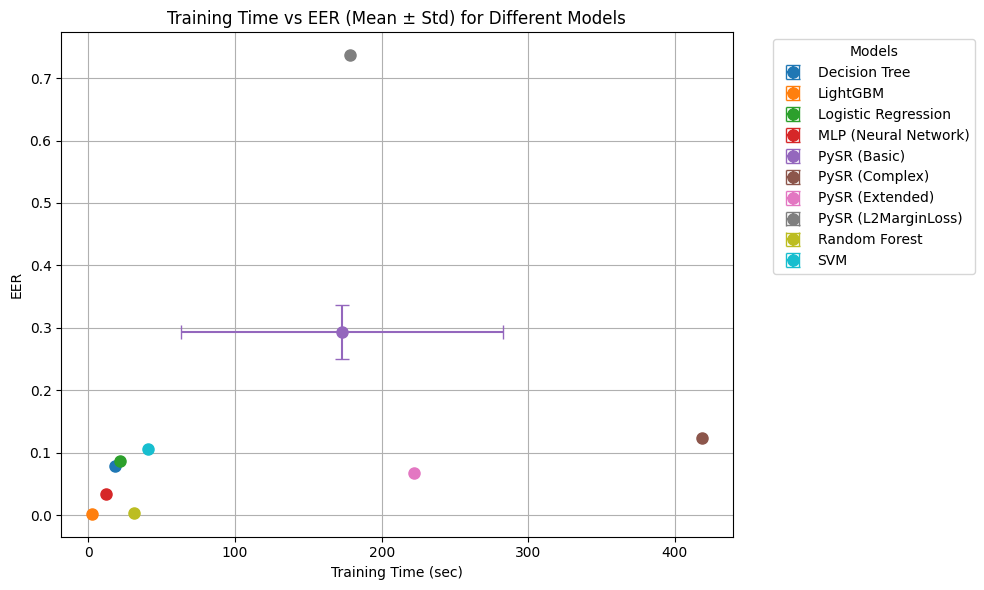

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o CSV com métricas
df_metrics = pd.read_csv("model_metrics.csv")
print("Metrics Data:")
print(df_metrics)

# Agrupar por modelo e calcular média e desvio padrão
agg = df_metrics.groupby("Model").agg({
    "Training Time (sec)": ["mean", "std"],
    "EER": ["mean", "std"]
}).reset_index()

# Renomear colunas
agg.columns = ["Model", "Time_mean", "Time_std", "EER_mean", "EER_std"]

# Plot com barras de erro
plt.figure(figsize=(10, 6))

for _, row in agg.iterrows():
    plt.errorbar(
        row["Time_mean"], row["EER_mean"],
        xerr=row["Time_std"], yerr=row["EER_std"],
        fmt='o', capsize=5, label=row["Model"], markersize=8
    )

# Eixos e título
plt.xlabel("Training Time (sec)")
plt.ylabel("EER")
plt.title("Training Time vs EER (Mean ± Std) for Different Models")
plt.grid(True)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
